<a href="https://colab.research.google.com/github/JotaPedroso/Machine-Learning/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping

In [ ]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [ ]:
dataset_train.shape

(1258, 6)

In [ ]:
training_set = dataset_train.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set) # Normalização dos dados
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [ ]:
X_train = [] # Vai possuir os 60 valores anteriores do y_train de acordo com os dados
y_train = []
for i in range(60, 1258):
  X_train.append(training_set_scaled[i-60:i, 0]) # Passagem dos dados ao X_train conforme o laço
  y_train.append(training_set_scaled[i, 0]) # valor no tempo atual (output esperado)
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
print(X_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]


In [ ]:
X_train.shape # Menor numero de linhas devido aos 60 primeiros dias de dados

(1198, 60)

In [ ]:
modelo = Sequential()
modelo.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
modelo.add(Dropout(0.2))
modelo.add(LSTM(units = 50, return_sequences = True))
modelo.add(Dropout(0.2))
modelo.add(LSTM(units = 50, return_sequences = True))
modelo.add(Dropout(0.2))
modelo.add(LSTM(units = 50))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 1)) # 1 neuronio pois é um valor continuo de dados (Regressão)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
modelo.compile(optimizer = 'adam', loss = 'mean_squared_error')

es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=30) #Monitoramento do loss com os dados de treino para parar e evitar overfitting

modelo.fit(X_train, y_train, epochs = 500, batch_size = 32, callbacks=[es])

Epoch 1/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0867
Epoch 2/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0073
Epoch 3/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0055
Epoch 4/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0051
Epoch 5/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0052
Epoch 6/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0048
Epoch 7/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0054
Epoch 8/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0058
Epoch 9/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0049
Epoch 10/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0051
Epoch 11/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0049
Epoch 12/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0040
Epoch 13/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0048
Epoch 14/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0038
Epoch 15/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - lo

In [ ]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0) #Concatenação dos dados de treino e teste

In [ ]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)

In [ ]:
inputs = sc.transform(inputs)
X_test = []
for i in range(60,80):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = modelo.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


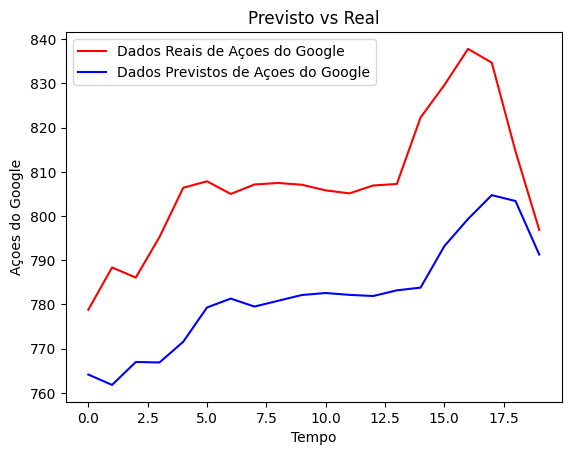

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Dados Reais de Açoes do Google') #Criação do grafico para comparar a
plt.plot(predicted_stock_price, color = 'blue', label = 'Dados Previstos de Açoes do Google')# previsão com os dados reais
plt.title('Previsto vs Real')
plt.xlabel('Tempo')
plt.ylabel('Açoes do Google')
plt.legend()